<a href="https://colab.research.google.com/github/Arjunwhatever/bird_detection/blob/main/bird_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fastbook


  Using cached fastbook-0.0.29-py3-none-any.whl.metadata (13 kB)
  Using cached datasets-2.20.0-py3-none-any.whl.metadata (19 kB)
  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12

In [4]:
!pip install duckduckgo-search


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.2 MB/s eta 0:00:00


In [9]:
from fastbook import *
import duckduckgo_search
url = search_images_ddg('bird photos', max_images =1)
len(url),url[0]

(1,
 'http://s1.picswalls.com/wallpapers/2014/07/18/birds-high-definition_104547222_54.jpg')

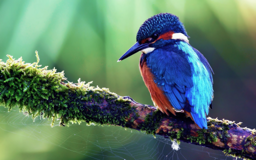

In [11]:
dest = Path('/content/birds-high-definition_104547222_54.jpg')
if not dest.exists(): download_url(url[0],dest, show_progress= False)
im = Image.open(dest)
im.to_thumb(256,256)

In [15]:
search = 'forest','bird'
path  = Path('bird_or_not')

if not path.exists():
  parent = (path)
  parent.mkdir(exist_ok=True)
  for o in search:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls = results[:200])
    resize_images(dest, max_size = 400, dest = dest)


In [16]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#15) [None,None,None,None,None,None,None,None,None,None...]

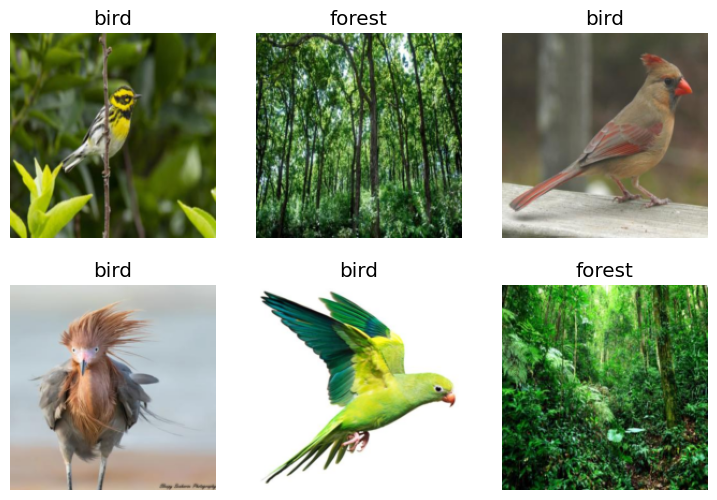

In [17]:
dls  = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]
).dataloaders(path)

dls.show_batch(max_n = 6)

In [18]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.603904,0.698544,0.232877,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.034693,0.082277,0.027397,01:07
1,0.033472,0.083592,0.013699,01:00
2,0.023414,0.093795,0.013699,01:03


In [19]:
is_bird,_,probs = learn.predict(PILImage.create('/content/birds-high-definition_104547222_54.jpg'))
print(f'This is a: {is_bird}')
print(f'Probability it is a bird: {probs[0]:.4f}')

This is a: bird
Probability it is a bird: 0.9999
